In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('credit.csv')

In [3]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
%matplotlib inline

In [5]:
data.shape

(1000, 17)

In [6]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
print(data.checking_balance.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


In [9]:
print(data.credit_history.value_counts())
print(data.purpose.value_counts())
print(data.savings_balance.value_counts())
print(data.employment_duration.value_counts())
print(data.other_credit.value_counts())
print(data.housing.value_counts())
print(data.job.value_counts())
print(data.phone.value_counts())

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [10]:
replace_col={'checking_balance':{'< 0 DM':1,'1 - 200 DM':2,'> 200 DM':3,'unknown':4},'savings_balance':{'100 - 500 DM':1,'500 - 1000 DM':2,'> 1000 DM':3,'< 100 DM':4,'unknown':5},'credit_history':{'critical':1,'poor':2,'good':3,'very good':4,'perfect':5},'purpose':{'furniture/appliances':1,'car':2,'business':3,'education':4,'renovations':5,'car0':6},'other_credit':{'none':1,'bank':2,'store':3},'housing':{'own':1,'rent':2,'other':3},'job':{'skilled':1,'unskilled':2,'management':3,'unemployed':4},'phone':{'no':1,'yes':2},'employment_duration':{'1 - 4 years':1,'> 7 years':2,'4 - 7 years':3,'< 1 year':4,'unemployed':5},'default':{'no':1,'yes':2}}

In [11]:
data=data.replace(replace_col)

In [12]:
col=['purpose','housing','other_credit','job']

In [13]:
data=pd.get_dummies(data,columns=col)

In [14]:
data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_1,housing_2,housing_3,other_credit_1,other_credit_2,other_credit_3,job_1,job_2,job_3,job_4
0,1,6,1,1169,5,2,4,4,67,2,...,1,0,0,1,0,0,1,0,0,0
1,2,48,3,5951,4,1,2,2,22,1,...,1,0,0,1,0,0,1,0,0,0
2,4,12,1,2096,4,3,2,3,49,1,...,1,0,0,1,0,0,0,1,0,0
3,1,42,3,7882,4,3,2,4,45,1,...,0,0,1,1,0,0,1,0,0,0
4,1,24,2,4870,4,1,3,4,53,2,...,0,0,1,1,0,0,1,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   amount                1000 non-null   int64
 4   savings_balance       1000 non-null   int64
 5   employment_duration   1000 non-null   int64
 6   percent_of_income     1000 non-null   int64
 7   years_at_residence    1000 non-null   int64
 8   age                   1000 non-null   int64
 9   existing_loans_count  1000 non-null   int64
 10  dependents            1000 non-null   int64
 11  phone                 1000 non-null   int64
 12  default               1000 non-null   int64
 13  purpose_1             1000 non-null   uint8
 14  purpose_2             1000 non-null   uint8
 15  purpose_3             1000 non-null   uint8
 16  purpose

In [16]:
data.isnull().values.any()

False

In [17]:
# split data
x=data.drop('default',axis=1)
y=data.pop('default')

In [18]:
x.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_1,housing_2,housing_3,other_credit_1,other_credit_2,other_credit_3,job_1,job_2,job_3,job_4
0,1,6,1,1169,5,2,4,4,67,2,...,1,0,0,1,0,0,1,0,0,0
1,2,48,3,5951,4,1,2,2,22,1,...,1,0,0,1,0,0,1,0,0,0
2,4,12,1,2096,4,3,2,3,49,1,...,1,0,0,1,0,0,0,1,0,0
3,1,42,3,7882,4,3,2,4,45,1,...,0,0,1,1,0,0,1,0,0,0
4,1,24,2,4870,4,1,3,4,53,2,...,0,0,1,1,0,0,1,0,0,0


In [19]:
y.head()

0    1
1    2
2    1
3    1
4    2
Name: default, dtype: int64

In [20]:
data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_1,housing_2,housing_3,other_credit_1,other_credit_2,other_credit_3,job_1,job_2,job_3,job_4
0,1,6,1,1169,5,2,4,4,67,2,...,1,0,0,1,0,0,1,0,0,0
1,2,48,3,5951,4,1,2,2,22,1,...,1,0,0,1,0,0,1,0,0,0
2,4,12,1,2096,4,3,2,3,49,1,...,1,0,0,1,0,0,0,1,0,0
3,1,42,3,7882,4,3,2,4,45,1,...,0,0,1,1,0,0,1,0,0,0
4,1,24,2,4870,4,1,3,4,53,2,...,0,0,1,1,0,0,1,0,0,0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(x_train,y_train)  

DecisionTreeClassifier(random_state=1)

In [23]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

1.0
0.6933333333333334


In [24]:
dtree=DecisionTreeClassifier(random_state=1,max_depth=8,criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [25]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.89
0.7366666666666667


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
import seaborn as sns

In [28]:
pread=dtree.predict(x_test)

In [29]:
c=confusion_matrix(y_test,pread,labels=[0,1])

In [30]:
df_c=pd.DataFrame(c,index=[i for i in ['no','yes']],columns=[i for i in ['no','yes']])

In [31]:
plt.figure(figsize=(7,5))

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<AxesSubplot:>

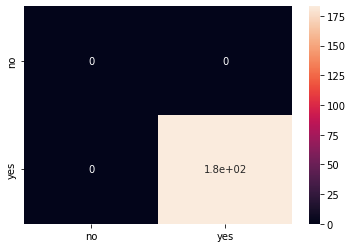

In [32]:
sns.heatmap(df_c,annot=True)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model=RandomForestClassifier(n_estimators=50,random_state=1,max_features=12)

In [35]:
model=model.fit(x_train,y_train)

In [36]:
pred=model.predict(x_test)

In [37]:
model.score(x_test,y_test)

0.7533333333333333

In [38]:
model.score(x_test,y_test)

1.0

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
bag_model=BaggingClassifier(n_estimators=50,max_samples=0.7,oob_score=True)

In [41]:
bag_model=bag_model.fit(x_train,y_train)

In [42]:
print(bag_model.oob_score_)

0.7471428571428571


In [43]:
# adaboosting
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada_model=AdaBoostClassifier(base_estimator=dtree,n_estimators=50) 

In [45]:
ada_model=ada_model.fit(x_train,y_train)

In [46]:
pred=ada_model.predict(x_test)

In [47]:
ada_model.score(x_test,y_test)

0.7533333333333333

In [48]:
# GradientDescent
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
g_model=GradientBoostingClassifier(n_estimators=50,learning_rate=0.09,max_depth=5)

In [50]:
g_model=g_model.fit(x_train,y_train)

In [51]:
pred=g_model.predict(x_test)

In [52]:
g_model.score(x_test,y_test)

0.7333333333333333